In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option ('display.max_columns', None)
pd.set_option ('display.max_rows', None)

In [2]:
#!pip install mlflow
import mlflow
import mlflow.sklearn

In [14]:
model_data = pd.read_csv('model_data_2021_2022_with_weather_vars.csv')

In [15]:
model_data.columns

Index(['Unnamed: 0', 'cv_cc', 'cv2_cc', 'cv2_act', 'sex', 'stroke',
       'cv2_cphss', 'triage', 'onset', 'test1', 'jaenan_sn', 'age', 'dbp1',
       'sbp1', 'pr1', 'rr1', 'bt1', 'spo2_1', 'dbp2', 'sbp2', 'pr2', 'rr2',
       'bt2', 'spo2_2', 'Spasm', 'Dizziness', 'Faint', 'Consciousness',
       'Paralysis', 'hy_di_disease', 'Disease_counts', 'Branch_name',
       'Temperature', 'Wind_Speed(m/s)', 'Precipitation(mm)', 'Humidity(%)',
       'Temp_max_month', 'Temp_min_month', 'Temp_avg_month',
       'Humidity_max_month', 'Humidity_min_month', 'Humidity_avg_month',
       'diff_Temp_max_month', 'diff_Temp_min_month', 'diff_Temp_avg_month',
       'diff_Humidity_max_month', 'diff_Humidity_min_month',
       'diff_Humidity_avg_month', 'Temp_max_day', 'Temp_min_day',
       'Temp_avg_day', 'Humidity_max_day', 'Humidity_min_day',
       'Humidity_avg_day', 'diff_Temp_max_day', 'diff_Temp_min_day',
       'diff_Temp_avg_day', 'diff_Humidity_max_day', 'diff_Humidity_min_day',
       'diff_H

In [16]:
model_data.shape

(99723, 60)

In [17]:
### We won't need alll the variables to run our model so dropping the unwanted vars
vars_to_drop = ['Unnamed: 0', 'jaenan_sn', 'Branch_name', 'test1', 'dbp2', 'sbp2', 'pr2', 'rr2',
       'bt2', 'spo2_2', 'Wind_Speed(m/s)', 'Precipitation(mm)', 'Humidity(%)', 'Humidity_max_month', 'Humidity_min_month', 'Humidity_avg_month',
       'diff_Temp_max_month', 'diff_Temp_min_month', 'diff_Temp_avg_month',
       'diff_Humidity_max_month', 'diff_Humidity_min_month',
       'diff_Humidity_avg_month', 'Temp_max_day', 'Temp_min_day',
       'Temp_avg_day', 'Humidity_max_day', 'Humidity_min_day',
       'Humidity_avg_day','diff_Humidity_max_day', 'diff_Humidity_min_day',
       'diff_Humidity_avg_day']

model_data = model_data.drop(vars_to_drop, axis = 1)
model_data.shape

(99723, 29)

In [18]:
null_variables = round((model_data.isna().sum()/len(model_data))*100,2)
null_variables

cv_cc                0.00
cv2_cc               0.00
cv2_act              0.00
sex                  0.00
stroke               0.00
cv2_cphss            0.01
triage               0.00
onset                0.00
age                  0.01
dbp1                 3.53
sbp1                 2.13
pr1                  0.43
rr1                  0.41
bt1                  0.53
spo2_1               1.11
Spasm                0.00
Dizziness            0.00
Faint                0.00
Consciousness        0.00
Paralysis            0.00
hy_di_disease        0.00
Disease_counts       0.00
Temperature          2.13
Temp_max_month       1.93
Temp_min_month       1.93
Temp_avg_month       1.93
diff_Temp_max_day    2.16
diff_Temp_min_day    2.16
diff_Temp_avg_day    2.16
dtype: float64

In [19]:
model_data = model_data.dropna()
model_data.shape

(93142, 29)

In [20]:
model_data.cv2_cphss.value_counts()

1.0    52066
0.0    41076
Name: cv2_cphss, dtype: int64

In [21]:
model_data.head()

,cv_cc,cv2_cc,cv2_act,sex,stroke,cv2_cphss,triage,onset,age,dbp1,sbp1,pr1,rr1,bt1,spo2_1,Spasm,Dizziness,Faint,Consciousness,Paralysis,hy_di_disease,Disease_counts,Temperature,Temp_max_month,Temp_min_month,Temp_avg_month,diff_Temp_max_day,diff_Temp_min_day,diff_Temp_avg_day
0,0,0,0,0,0,1.0,0,0,76.0,81.0,117.0,149.0,14.0,37.1,96.0,0,0,0,1,0,0,0,9.2,11.0,-19.9,-3.444953,3.8,0.3,1.737500
1,0,0,0,0,0,1.0,0,0,78.0,70.0,120.0,144.0,28.0,40.0,92.0,0,0,0,1,0,1,3,-2.6,16.6,-12.2,-0.290199,-0.8,1.2,0.454167
2,0,3,2,0,0,1.0,0,0,50.0,118.0,227.0,101.0,15.0,37.7,98.0,0,0,0,0,1,1,1,-1.9,16.2,-9.7,0.387443,-7.0,-3.0,-6.058333
3,1,2,0,1,0,0.0,1,0,74.0,100.0,180.0,111.0,18.0,36.3,99.0,0,0,1,0,0,1,2,3.3,16.6,-12.2,-0.290199,-6.5,-13.9,-8.762500
4,0,3,1,1,0,1.0,0,0,28.0,110.0,220.0,96.0,13.0,37.2,98.0,0,0,0,0,1,1,1,2.6,18.6,-10.0,0.733206,-6.8,-7.7,-5.762500


In [33]:
#!pip install -U scikit-learn

In [22]:
## Data splitting and scaling
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, f1_score
from tqdm import tqdm

In [23]:
X = model_data.iloc[:,model_data.columns != 'cv2_cphss']
y = model_data.cv2_cphss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)

In [24]:
#!pip install lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [19:40<00:00, 40.72s/it] 


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.85,0.84,0.84,0.85,0.54
XGBClassifier,0.85,0.84,0.84,0.85,3.04
RandomForestClassifier,0.85,0.84,0.84,0.85,14.27
ExtraTreesClassifier,0.85,0.84,0.84,0.85,8.96
AdaBoostClassifier,0.85,0.84,0.84,0.85,4.01
SVC,0.85,0.83,0.83,0.84,620.49
NuSVC,0.84,0.83,0.83,0.84,423.09
BaggingClassifier,0.83,0.83,0.83,0.83,8.43
LinearSVC,0.84,0.82,0.82,0.83,19.24


In [9]:
#mlflow.set_tracking_uri("/home/nilesh/Downloads/stroke data/mlflow/mlruns")

In [10]:
#tracking_uri = mlflow.get_tracking_uri()
#tracking_uri

In [25]:
experiment_id = mlflow.create_experiment("training experiment RF_weather")

In [ ]:
n_estimators_range = np.arange(100, 500, 25)
max_depth_range = np.arange(5, 25, 2)
max_features_range = ["sqrt", None, "log2"]


for n_estimators in tqdm(n_estimators_range):
    for max_depth in tqdm(max_depth_range, leave=False):
        for max_features in tqdm(max_features_range, leave=False):

            with mlflow.start_run(experiment_id=experiment_id):

                model = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    max_features=max_features,
                    n_jobs=3,
                )

                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred)
                recall = recall_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred)
                auc = roc_auc_score(y_test, y_pred)

                mlflow.log_param("n_estimators", n_estimators)
                mlflow.log_param("max_depth", max_depth)
                mlflow.log_param("max_features", max_features)

                mlflow.log_metric("accuracy", accuracy)
                mlflow.log_metric("precision", precision)
                mlflow.log_metric("recall", recall)
                mlflow.log_metric("f1", f1)
                mlflow.log_metric("auc", auc)

                mlflow.sklearn.log_model(model, "model")

In [ ]:
experiment_id = mlflow.create_experiment("training experiment LightGBM_weather")

objective = 'binary'
boosting_type_range = ['gbdt', 'dart', 'goss']
max_depth_range = np.arange(1, 25, 1)
learning_rate_range = np.arange(0.001, 0.01, 0.001)



for boosting_type in tqdm(boosting_type_range):
    for max_depth in tqdm(max_depth_range, leave=False):
        for learning_rate in tqdm(learning_rate_range, leave=False):

            with mlflow.start_run(experiment_id=experiment_id):

                model = lgb.LGBMClassifier(
                    boosting_type=boosting_type,
                    max_depth=max_depth,
                    learning_rate=learning_rate,
                )

                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred)
                recall = recall_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred)
                auc = roc_auc_score(y_test, y_pred)

                mlflow.log_param("boosting_type", boosting_type)
                mlflow.log_param("max_depth", max_depth)
                mlflow.log_param("learning_rate", learning_rate)

                mlflow.log_metric("accuracy", accuracy)
                mlflow.log_metric("precision", precision)
                mlflow.log_metric("recall", recall)
                mlflow.log_metric("f1", f1)
                mlflow.log_metric("auc", auc)

                mlflow.sklearn.log_model(model, "model")

In [ ]:
from xgboost import XGBClassifier

experiment_id = mlflow.create_experiment("training experiment XGBoost_weather")

objective = 'binary:logistic'
booster_type_range = ['gbtree', 'gblinear', 'dart']
max_depth_range = np.arange(1, 25, 1)
max_leaves = 0

for booster in tqdm(booster_type_range):
    for max_depth in tqdm(max_depth_range, leave=False):
        with mlflow.start_run(experiment_id=experiment_id):

            model = XGBClassifier(
                booster = booster,
                max_depth = max_depth,
                max_leaves=max_leaves,
                objective = objective
            )

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            auc = roc_auc_score(y_test, y_pred)

            mlflow.log_param("booster_type", booster)
            mlflow.log_param("max_depth", max_depth)

            mlflow.log_metric("accuracy", accuracy)
            mlflow.log_metric("precision", precision)
            mlflow.log_metric("recall", recall)
            mlflow.log_metric("f1", f1)
            mlflow.log_metric("auc", auc)

            mlflow.sklearn.log_model(model, "model")

In [33]:

# importing random forest classifier from ensemble module
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 225, max_features = None, max_depth = 13) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
train_acc = clf.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

print(classification_report(y_test, y_pred))

The Accuracy for Training Set is 87.42367103726866
The Accuracy for Test Set is 85.44742068817435
              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82      8215
         1.0       0.82      0.95      0.88     10414

    accuracy                           0.85     18629
   macro avg       0.87      0.84      0.85     18629
weighted avg       0.86      0.85      0.85     18629



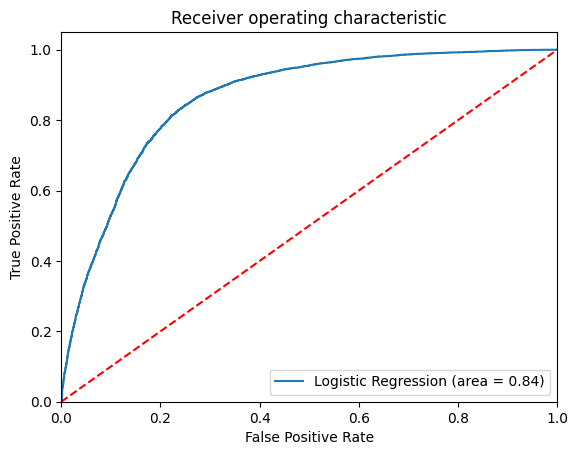

In [34]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [35]:
feature_imp = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feature_imp

Faint               0.30
Dizziness           0.23
Paralysis           0.09
cv2_act             0.06
cv2_cc              0.06
cv_cc               0.04
triage              0.04
Consciousness       0.03
age                 0.02
bt1                 0.01
spo2_1              0.01
sbp1                0.01
pr1                 0.01
Spasm               0.01
Temperature         0.01
diff_Temp_avg_day   0.01
diff_Temp_min_day   0.01
diff_Temp_max_day   0.01
dbp1                0.01
Temp_max_month      0.01
Temp_avg_month      0.01
Temp_min_month      0.01
rr1                 0.01
hy_di_disease       0.00
Disease_counts      0.00
stroke              0.00
sex                 0.00
onset               0.00
dtype: float64

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)
train_acc = model.score(X_train, y_train)
y_pred = model.predict(X_test)

# metrics are used to find accuracy or error
train_acc = model.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

print(classification_report(y_test, y_pred))

The Accuracy for Training Set is 80.11487928280971
The Accuracy for Test Set is 80.32100488485693
              precision    recall  f1-score   support

         0.0       0.81      0.73      0.77      8215
         1.0       0.80      0.86      0.83     10414

    accuracy                           0.80     18629
   macro avg       0.80      0.80      0.80     18629
weighted avg       0.80      0.80      0.80     18629



In [37]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# metrics are used to find accuracy or error
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

print(classification_report(y_test, y_pred))

The Accuracy for Training Set is 83.3639767557339
The Accuracy for Test Set is 83.47200601213163
              precision    recall  f1-score   support

         0.0       0.87      0.73      0.80      8215
         1.0       0.81      0.92      0.86     10414

    accuracy                           0.83     18629
   macro avg       0.84      0.82      0.83     18629
weighted avg       0.84      0.83      0.83     18629



In [39]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 225, max_features = None, max_depth = 13) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train_scaled, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test_scaled)

# metrics are used to find accuracy or error
train_acc = clf.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

print(classification_report(y_test, y_pred))

The Accuracy for Training Set is 87.42501308496504
The Accuracy for Test Set is 85.42594878952171
              precision    recall  f1-score   support

         0.0       0.92      0.73      0.82      8215
         1.0       0.82      0.95      0.88     10414

    accuracy                           0.85     18629
   macro avg       0.87      0.84      0.85     18629
weighted avg       0.86      0.85      0.85     18629

